<a href="https://colab.research.google.com/github/mjshahhoseini/TurbuStat-in-LocalClouds/blob/main/MJ_turbustat_12COvs13CO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Turbulence in local molecular clouds using TurbuStat #

Project advisors: Eric Koch (eric.koch AT cfa.harvard.edu) and Annie Hughes (Annie.Hughes AT irap.omp.eu)

## Project overview ##

We will explore a few different data sets that are all publicly available:

* Perseus from COMPLETE ([Ridge et al. 2006](https://ui.adsabs.harvard.edu/abs/2006AJ....131.2921R/abstract)) [DATA LINK](https://lweb.cfa.harvard.edu/COMPLETE/data_html_pages/FCRAO.html)
* Ophiuchus from COMPLETE ([Ridge et al. 2006](https://ui.adsabs.harvard.edu/abs/2006AJ....131.2921R/abstract)) [DATA LINK](https://lweb.cfa.harvard.edu/COMPLETE/data_html_pages/FCRAO.html)
* Orion from CARMA-NRO ([Kong et al. 2018](https://ui.adsabs.harvard.edu/abs/2018ApJS..236...25K/abstract); [Kong et al. 2021](https://ui.adsabs.harvard.edu/abs/2021RNAAS...5...55K/abstract)) [DATA LINK](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/6Q26PN)

Each of these data sets traces 12CO(1-0) and 13CO(1-0). **If you use these data in any publication, please cite all relevant papers mentioned in their respective data releases!**

Because they are highly resolved, we have many options for measuring and comparing the turbulent properties in these clouds:

* Compare entire clouds against each other: Different statistics running on the entire image or data cube.
* Localized variations in turbulence: Splitting each image or data cube into sections, and comparing within and between the clouds.
* Compare different turbulence statistics between 12CO and 13CO: Each tracer is sensitive to a different range in gas volume density. This comparison sheds light on how the ISM structure changes at different volume densities.

The goal of this project is to explore these different possibilities, or beyond if anyone has other ideas they might be interested in exploring. TurbuStat's advantage for these comparisons are its [distance measures](https://turbustat.readthedocs.io/en/latest/tutorials/metrics/running_metrics.html#runmetrics) so that regions can be quantiatively compared, based on turbulence statistics.

Turbulence plays a key role in modern star formation theories, and by comparing between different clouds and regions within clouds, we can test whether turbulent properties vary, how that affects where star formation occurs, and what role stellar feedback has in driving this turbulence.



## Helpful links ##

[TurbuStat documentations](https://turbustat.readthedocs.io/en/latest/index.html)

[TurbuStat tutorials](https://turbustat.readthedocs.io/en/latest/tutorials/index.html)

NOTE: Each turbulence statistic tutorial includes references to relevant literature. These may not be complete but will provide at least a good starting point to learn more about each technique.

## Some literature on using TurbuStat to compare data sets ##

[Definition of the distance metric - Koch+2017](https://ui.adsabs.harvard.edu/abs/2017MNRAS.471.1506K/abstract)

[Visualizing how feedback affects turbulence statistics - Boyden+2016](https://ui.adsabs.harvard.edu/abs/2016ApJ...833..233B/abstract)

[Comparisons between different spectral line tracers - Boyden+2018](https://ui.adsabs.harvard.edu/abs/2018ApJ...860..157B/abstract)


## Which python packages will you need? ##

See the [turbustat install page](https://turbustat.readthedocs.io/en/latest/install.html) for more details.

* astropy>=2.0
* numpy>=1.7
* matplotlib>=1.2
* scipy>=0.12
* sklearn>=0.13.0
* statsmodels>=0.4.0
* scikit-image>=0.12

Some of the statistics require additional packages:

* spectral-cube `pip install spectral_cube`
* reproject `pip install reproject`
* radio-beam `pip install radio_beam` (will be installed with spectral-cube)
* astrodendro `pip install astrodendro`
* emcee `pip install emcee`


## Installing on co-lab ##

In [ ]:
!pip install astropy sklearn
!pip install statsmodels
!pip install scikit-image
!pip install spectral-cube
!pip install reproject
!pip install astrodendro
!pip install emcee

!pip install turbustat

     |████████████████████████████████| 225kB 23.7MB/s 
     |████████████████████████████████| 81kB 8.9MB/s 
     |████████████████████████████████| 1.3MB 29.2MB/s 
     |████████████████████████████████| 215kB 42.6MB/s 
     |████████████████████████████████| 4.6MB 23.5MB/s 
  Created wheel for astrodendro: filename=astrodendro-0.2.0-cp37-none-any.whl size=3160588 sha256=4b0e454fc949383a613175dc33919324414d94cc8cddd6cec31b437275bc84e5
  Stored in directory: /root/.cache/pip/wheels/71/10/0a/05e4c74e580b41c0aaa5945809eff04fb022b71597d979e452
Successfully built astrodendro
     |████████████████████████████████| 51kB 5.6MB/s 
     |████████████████████████████████| 3.0MB 24.5MB/s 


## Where can I find that? Is any preprocessing required? ##

Some initial preprocessing can often be useful, especially when comparing between two different datasets. Some suggested preprocessing examples are shown in `data_preprocessing.ipynb`.

In [ ]:
# Enable plotting in notebook
# NOTE: only static inline plots seem to work in co-lab (so no %matplotlib notebook or %matplotlib qt)
# If someone knows a way around this, please let us know!!
%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u

# plt.ioff()

# Check that turbustat has been installed.
try:
    import turbustat
except ImportError:
    print("Turbustat could not be installed. Check the installation and then restart the jupyter kernel.")


This notebook will demonstrate different ways that these data sets can be explored turbulence statistics.

It is meant to be a guide that you can build off of for this project.

## Loading the data ##



In co-lab, we can mount the shared google drive to access the data WITHOUT needing to download it.

Note that some operations may be limited by the storage space and RAM on co-lab.

In [ ]:
# See: https://colab.research.google.com/notebooks/io.ipynb#scrollTo=RWSJpsyKqHjH
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Check where this shared drive is located:
!ls /content/drive/Shareddrives/ISM\ School\ 2021\ -\ Turbulence

 Ophiuchus   Perseus		    'Turbulence Project Overview.gslides'
 orig	    'Project Tasks.gsheet'   turbustat_overview_localclouds.ipynb
 Orion	     README.gdoc


In [ ]:
from astropy.io import fits
from spectral_cube import SpectralCube, Projection
import os

# Define your path to the data
data_path = "/content/drive/Shareddrives/ISM School 2021 - Turbulence"

# Load a fits file
cube_filename = os.path.join(data_path, 'Orion/CARMA_NRO_Orion_12co_smoothed46.fits')
moment0_filename = os.path.join(data_path, 'Orion/mom0_12co_pix_2_Tmb_smoothed46.fits')

hdu = fits.open(cube_filename)

# Load as a SpectralCube
cube = SpectralCube.read(cube_filename)

# Load as a 2D Projection
proj = Projection.from_hdu(fits.open(moment0_filename))


`fits.open` returns a list of HDU objects. For all of the data we will use here, there will only be one HDU in the FITS files.

In [ ]:
# HDU
hdu[0]

A spectral-cube has far more features to view the data or perform analyses. (e.g., see the `data_preprocessing.ipynb` notebook for further examples). The documentation is available at: [https://spectral-cube.readthedocs.io/en/latest/](https://spectral-cube.readthedocs.io/en/latest/).

In [ ]:
cube

SpectralCube with shape=(85, 400, 255) and unit=K:
 n_x:    255  type_x: RA---SIN  unit_x: deg    range:    83.280637 deg:   84.845402 deg
 n_y:    400  type_y: DEC--SIN  unit_y: deg    range:    -7.243936 deg:   -4.804961 deg
 n_s:     85  type_s: VOPT      unit_s: m / s  range:    -1939.033 m / s:   19066.881 m / s

spectral-cube also handles 2D images as `Projection`s:

In [ ]:
# Prints a 2D array (truncated due to the size.)
proj

<Projection [[           nan,            nan,            nan, ...,
                         nan,            nan,            nan],
             [           nan,            nan,            nan, ...,
                         nan,            nan,            nan],
             [           nan,            nan,            nan, ...,
                         nan,            nan,            nan],
             ...,
             [           nan,            nan,            nan, ...,
              2.08554963e+00, 1.54109912e-02,            nan],
             [           nan,            nan,            nan, ...,
              3.02900463e-02, 4.63733341e-04,            nan],
             [           nan,            nan,            nan, ...,
                         nan,            nan,            nan]]>

# Examples using TurbuStat #

This notebook serves as starting place to explore turbulence statistics in different ways. Each of the following examples can be adapted to use other data sets (beyond those listed at the top) and different methods implemented in TurbuStat.

For more information, see the tutorials and documentation for [TurbuStat](https://turbustat.readthedocs.io/en/latest/tutorials/index.html).

Before running any statistics, we should first take a quick look at an image of this region:

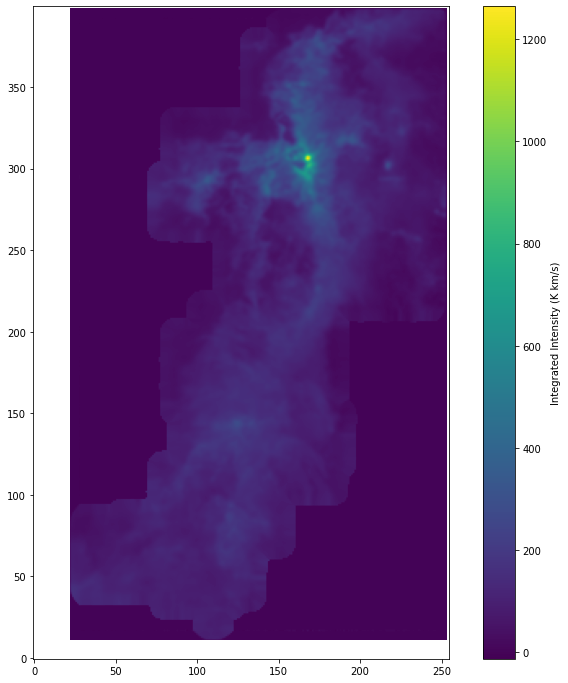

In [ ]:
plt.figure(figsize=(12, 12))
plt.imshow(proj.value, origin='lower')
cbar = plt.colorbar()
cbar.set_label('Integrated Intensity (K km/s)')

## Running turbulence statistics on one data set ##

This is the most standard use of turbulence statistics: computing on a single data set (image or cube).

In this example, we will use 2 power spectrum based methods:

1. the 2D power spectrum on an image ([tutorial](https://turbustat.readthedocs.io/en/latest/tutorials/statistics/pspec_example.html));
2. Velocity Channel Analysis (VCA) method on a cube ([Lazarian & Pogosyan (2004)](https://ui.adsabs.harvard.edu/abs/2004ApJ...616..943L/abstract)) ([tutorial](https://turbustat.readthedocs.io/en/latest/tutorials/statistics/vca_example.html)).

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     8505.
Date:                Wed, 14 Jul 2021   Prob (F-statistic):          1.57e-186
Time:                        15:04:41   Log-Likelihood:                 104.28
No. Observations:                 237   AIC:                            -204.6
Df Residuals:                     235   BIC:                            -197.6
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7775      0.026    182.451      0.0

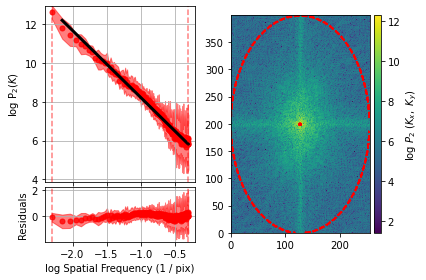

In [ ]:
# 2D power spectrum

from turbustat.statistics import PowerSpectrum

# Give the data as an HDU or Projection (see above)
pspec = PowerSpectrum(proj)

# Run the default settings with "run"
# NOTE: on large 2D images, first disable the 2D fitting procedure. It is the most computationally expensive part!
pspec.run(verbose=True, fit_2D=False)

Each turbustat method returns some plot and (in most cases) a summary of the fitting procedure.

For the power spectrum, we fit a linear relation to the log-log power spectrum shown on the left in the plot. The black line is the fit whose statistics are described in the summary above, and the residual from the fit is shown on the bottom left.

The right-hand plot shows the full 2D power spectrum. The 1D on the left is the azimuthal averaged values in radial bins, starting from the centre in the 2D power spectrum.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     3957.
Date:                Wed, 14 Jul 2021   Prob (F-statistic):          4.98e-149
Time:                        15:04:53   Log-Likelihood:                 76.676
No. Observations:                 237   AIC:                            -149.4
Df Residuals:                     235   BIC:                            -142.4
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8164      0.036    189.249      0.0

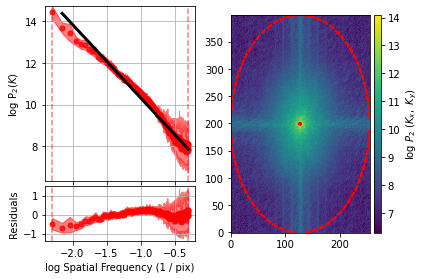

In [ ]:
# VCA

from turbustat.statistics import VCA

# Pass the HDU or a SpectralCube.
vca = VCA(cube)

# Again, you can disable the 2D power spectrum fit to start. On small images, it will take <1 min to run.
# On large images (>1000x1000), it may take up to an hour depending on the image size.
vca.run(verbose=True, fit_2D=False)

The VCA has a similar output to the power spectrum.

Using the `run` function, most statistics will use reasonable default values. However, we often need to tweak these defaults to find the optimal fit to the turbulence statistic.

For the VCA, not that the residuals are larger than for the 2D power spectrum. There can be many reasons for this, including an actual physical "break" scale. Often, though, these deviations are due to some systematic in the observation. The VCA spectrum above shows a few of these:

1. The "cross" pattern in the 2D image results from Gibbs ringing: the FFT assume periodic boundaries, but our data has non-zero values at the edge of the observed region. In this case, we should first apply an apodizing function to smoothly taper the edges of the data. [Here](https://turbustat.readthedocs.io/en/latest/tutorials/applying_apodizing_functions.html) is a tutorial of this process.

2. Noise on small scales will result in a flat spectrum. In the above spectrum shown in the left hand plot, this is the cause of the flattened power spectrum on the lower right hand (`log Spatial Frequency > -0.5` approx.). When the signal-to-noise ratio (SNR) is lower, noise will dominate a larger frequency range in the data. While the noise could also be modeled, the simplest way is to set `high_cut` in `VCA.run` to avoid fitting that range. An example is shown in the VCA tutorial linked above.

3. The telescope's beam will tend to steepen the power spectrum on small scales. In the left hand plot above, this (along with the noise) is the cause of the steepening at `log Spatial Frequency > -0.1`. This results from the beam's response, where neighbouring pixels are highly correlated by the beam. A tutorial on accounting for the effect of a telescope beam is described [here](https://turbustat.readthedocs.io/en/latest/tutorials/correcting_for_the_beam.html).

For this example, the most serious issue to fix is 1., apodizing the data to remove the Gibbs ringing. Here is an example applying a Tukey window to apodize the data and limiting the spatial fitting range with `high_cut`


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     3887.
Date:                Wed, 14 Jul 2021   Prob (F-statistic):           8.42e-44
Time:                        15:05:32   Log-Likelihood:                 67.507
No. Observations:                  45   AIC:                            -131.0
Df Residuals:                      43   BIC:                            -127.4
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.3999      0.057    129.259      0.0

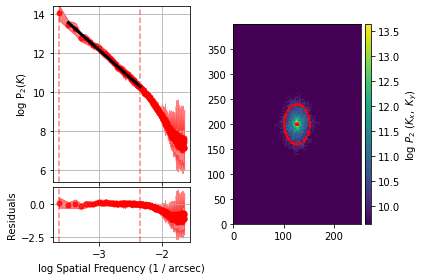

In [ ]:
vca = VCA(cube)

# Set fitting limit at 0.1 / u.pix (so a log-value of -1.)
vca.run(verbose=True, fit_2D=False, apodize_kernel='tukey', high_cut=0.1 / u.pix, xunit=u.arcsec**-1)

## Comparing two data sets: quantifying differences as a "distance" ##

Turbulence statistics provide a succinct measure of the observed ISM structure in an image. Because of this, they are valuable to summarize _differences_ between different data, as well.

TurbuStat provides a range of distance metrics using turbulence statistics. Definitions of the distance metrics and tutorials for the different statistics is available from the [tutorial page](https://turbustat.readthedocs.io/en/latest/tutorials/index.html).

In this example, we will explore the distance metric of the 2D spatial power spectrum (see example above) to compare the fitted power spectrum index of the Orion data used above and the COMPLETE Ophiuchus 12CO moment 0:

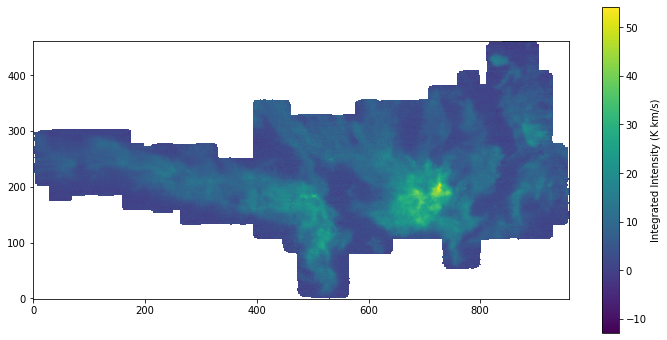

In [ ]:
oph_mom0 = Projection.from_hdu(fits.open(os.path.join(data_path, 'Ophiuchus/OphA_12coFCRAO_F_map_sliced_withbeam.fits')))

plt.figure(figsize=(12, 6))
plt.imshow(oph_mom0.value, origin='lower')
cbar = plt.colorbar()
cbar.set_label('Integrated Intensity (K km/s)')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     8505.
Date:                Wed, 14 Jul 2021   Prob (F-statistic):          1.57e-186
Time:                        15:05:49   Log-Likelihood:                 104.28
No. Observations:                 237   AIC:                            -204.6
Df Residuals:                     235   BIC:                            -197.6
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7775      0.026    182.451      0.0

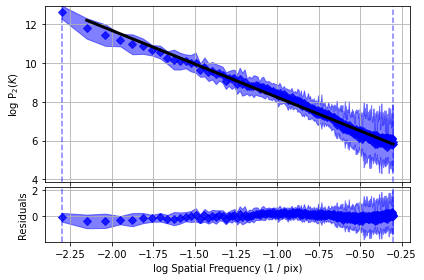

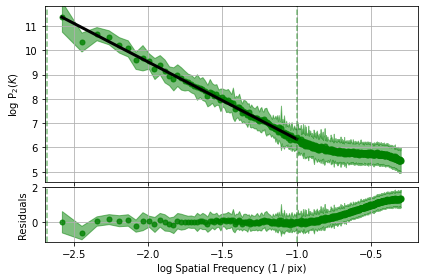

IndexError: ignored

<Figure size 432x288 with 0 Axes>

In [ ]:
from turbustat.statistics import PSpec_Distance

pspec_dist_orion_oph = PSpec_Distance(proj, oph_mom0, high_cut=[None, 0.1 / u.pix])

pspec_dist_orion_oph.distance_metric(verbose=True)

**NOTE: There is currently a bug in TurbuStat that the plotting shows in 2 different axes in a notebook environment.**

You may see an error about the legend missing. This is ok and should only affect the plot, not the distance metric.

The distance metric runs the power spectrum on both data sets (mimicking the `PowerSpectrum` example above), and computes a "distance" based on the difference in the power spectrum indices.

In this case, the distance metric is defined as the t-statistic between the two power spectrum indices:

$$d_{\rm PSpec} = \frac{|\beta_{\rm Orion} - \beta_{\rm Oph}|}{\sqrt{\sigma_{\beta_{\rm Orion}}^2 + \sigma_{\beta_{\rm Oph}}^2}}$$

The numerator is the absolute difference between the indices $\beta$ and the denominator is the uncertainty added in quadrature on the indices from the fit, $\sigma_{\beta}$. This definition provides a measure of how different the data sets are, while normalizing based on the inherent uncertainty.

In this case, the distance between the 12CO moment 0 maps of Orion and Ophiuchus is:

In [ ]:
pspec_dist_orion_oph.distance

3.8964109631876416

What does this number mean? By itself, the distance metric for this case suggests there is $\sim3.9\sigma$ difference between the indices. However, this value remains relative and we need to some common baseline to provide an absolute measure of "different" vs. "similar".

Ideally, we can setup a controlled experiment to provide a common baseline for a distance metric. For example, [Koch et al. (2017)](https://ui.adsabs.harvard.edu/abs/2017MNRAS.471.1506K/abstract) does this with a suite of numerical simulations and synthetic 13CO data cubes chosen according to a strict experimental design. This works when we can simply choose the initial starting parameters in a numerical simulation, but far more difficult in observations where we have access to far less information.

Instead of an absolute measure of difference, we can intercompare different data sets to get a _relative_ measure of difference. For example, with the 3 data sets listed at the top, we can make 3 comparisons: Orion vs. Ophiuchus, Orion vs. Perseus, and Ophiuchus vs. Perseus. From this, we can distinguish whether one region is more or less different than the others. These differences could then be compared with other measures about the region (for example, cloud mass, average velocity dispersion, star formation rate, etc) to investigate _why_ turbulence statistics may vary in one cloud vs. another.

Similar measures can be defined by making these comparisons between different tracers (e.g., 12CO and 13CO) for different clouds, or between different regions within each cloud. Examples of these comparisons are shown in the examples below.

## Running statistics on different regions in the same data set ##

An alternate way of using the distance metrics is to compare different regions _within_ a molecular cloud. This is a large advantage for studying nearby molecular clouds because we readily resolve the molecular cloud substructure (e.g., filamentary structure, etc.).

For this example, we will use another turbulence statistic: the Spectral Correlation Function (SCF). See the [method tutorial]( https://turbustat.readthedocs.io/en/latest/tutorials/statistics/scf_example.html) and the [distance metric tutorial](https://turbustat.readthedocs.io/en/latest/tutorials/metrics/scf_example.html). The data we will compare is the Orion data at the _original_ high resolution (see the "orig" folder; these data are the version available in the team's public release). This is a fantastic data set, and we can use the very high angular resolution to retain more information about the cloud substructure.

**Note: the original data release CO cubes are ~4 GB each. Many turbulence statistics will take >1 hr to run on such a large cube.**

First, we will load in the 12CO moment 0 map to view and select 2 regions to slice from the 12CO data cube.

In [ ]:
orion_mom0_12co = Projection.from_hdu(fits.open(os.path.join(data_path, 'Orion/mom0_12co_pix_2_Tmb.fits')))

NameError: ignored

Did this end in an error where there was too many axes (3 instead of 2)? This happens because the data was saved with a redundant spectral axis in the header.

There is a simple way we can get around this by loading the map as a spectral-cube, then slicing the 0th plane in the spectral dimension:

In [ ]:
# orion_mom0_12co = SpectralCube.read(os.path.join(data_path, 'Orion/mom0_12co_pix_2_Tmb.fits'))[0]  # ends with slicing out the 0th element!

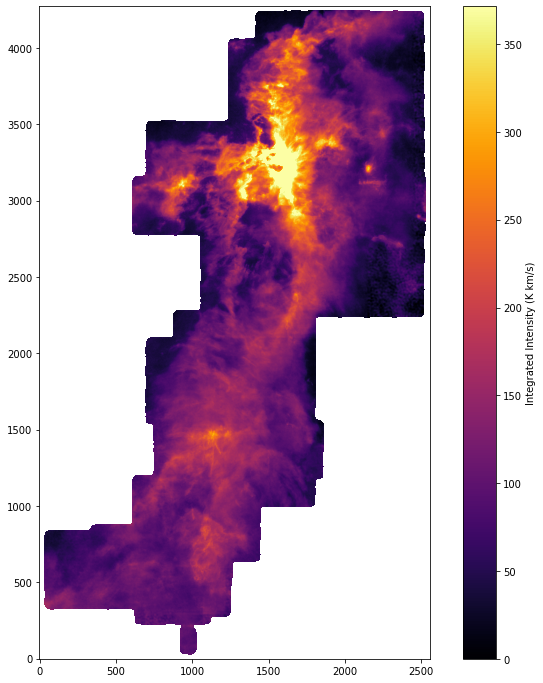

In [ ]:
# This will plot the data in pixel coordinates, just to make it easier to select regions to slice out.
# WCS coordinates can also be used. See examples here: https://spectral-cube.readthedocs.io/en/latest/manipulating.html
# vmax is scaled to the 99th percentile integrated intensity.
plt.figure(figsize=(12, 12))

plt.imshow(orion_mom0_12co.value, origin='lower', cmap='inferno',
           vmin=0., vmax=np.nanpercentile(orion_mom0_12co.value, 99))

cbar = plt.colorbar()
cbar.set_label('Integrated Intensity (K km/s)')

We will select two regions that vary drastically in their integrated intensity:

1. The bright central region: `y=[3000, 3500]; x=[1300;1800]`
2. A fainter region at the NW side of the map: `y=[3750, 4250]; x=[1800;2300]`

Note: it may be helpful to open the data in a more interactive format to choose regions. For example, ds9, carta, casaviewer, glue, or whatever your preferred FITS viewer is.

Let's first check the regions we have chosen:

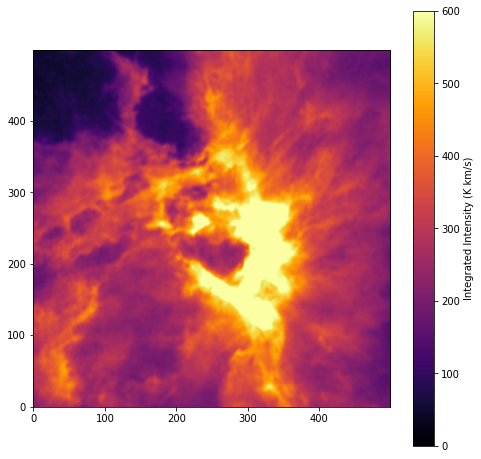

In [ ]:
# Region 1:

plt.figure(figsize=(8, 8))

orion_mom0_12co_region1 = orion_mom0_12co[3000:3500, 1300:1800]

plt.imshow(orion_mom0_12co_region1.value, origin='lower', cmap='inferno',
           vmin=0., vmax=600)

cbar = plt.colorbar()
cbar.set_label('Integrated Intensity (K km/s)')

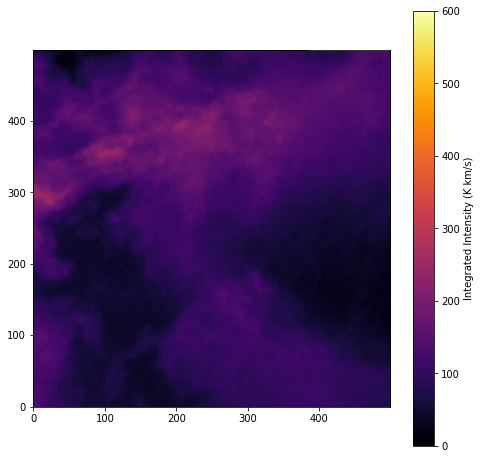

In [ ]:
# Region 2:

plt.figure(figsize=(8, 8))

orion_mom0_12co_region2 = orion_mom0_12co[3750:4250, 1800:2300]

plt.imshow(orion_mom0_12co_region2.value, origin='lower', cmap='inferno',
           vmin=0., vmax=600)

cbar = plt.colorbar()
cbar.set_label('Integrated Intensity (K km/s)')

In both regions, the images are scaled to the same colour map range to emphasis the difference in brightness. Using the SCF, we will explore whether their spatial and spectral structure in these regions is the similar or different.

/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/turbustat/statistics/scf/scf.py:970: RuntimeWarning: divide by zero encountered in true_divide
  dist_weight = 1 / np.sqrt(a ** 2 + b ** 2)


<Figure size 864x864 with 0 Axes>

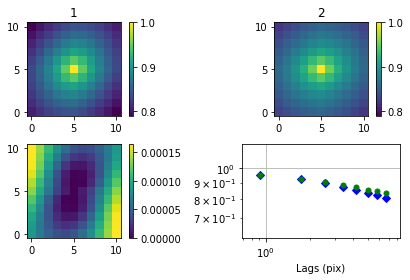

In [ ]:
from turbustat.statistics import SCF_Distance

# Load the data cube: this is in the "orig" folder
orion_12co_cube = SpectralCube.read(os.path.join(data_path, 'orig/Orion/CARMA_NRO_Orion_12co.fits'))

# Velocity axis, y axis, x axis is the ordering.
# We will only slice along the spatial axes
orion_12co_cube_region1 = orion_12co_cube[:, 3000:3500, 1300:1800]
orion_12co_cube_region2 = orion_12co_cube[:, 3750:4250, 1800:2300]

# Calculate the SCF for both, and derive the distance between the two regions:
scf_dist = SCF_Distance(orion_12co_cube_region1, orion_12co_cube_region2)

# NOTE: this will take ~60 s to run!
plt.figure(figsize=(12, 12))
scf_dist.distance_metric(verbose=True)


The SCF distance returns the above figure. In the top row, the SCF correlation surface is shown for both, out to a maximum "lag" distance of 11 pixels (the default distance). Each pixel is the correlation of the data cube with itself shifted by a "lag" distance. To create the surface, we compute the correlations over a range of lags in both the x and y dimensions.

The bottom row on the left hand side is the difference between the SCF correlation surfaces shown in the top row, weighted by the lag distance. The bottom right hand panel is the radial profiles of the SCF surfaces in the top rows.

From this, we can see that there is a small difference in the correlations between regions 1 and 2 that becomes larger at large lag distances. Further, the bottom left hand plot shows that the correlation differs in the y direction more than the x. These differences are likely driven by the bright filamentary structure in region 1, which is aligned approximately north-south.

The distance metric in this case is:

In [ ]:
scf_dist.distance

0.015024508746075308

Similar to the power spectrum distance metric example above, this is a _relative_ distance measure. By making more comparisons between different regions, we can distinguish _more_ similar and _more_ different regions using the distance metric.

Also similar to the power spectrum example above, these distances between regions within a molecular cloud could then be compared to star formation rate, number of star-forming cores within the region, or other properties to investigate what could be driving the differences in the turbulence statistics. In the above example, we may expect a difference based on the active star formation in region 1 relative to region 2, where strong stellar feedback may be driving more turbulence or impacting the ISM structure.

Similar sub-region comparisons could also be done between the different clouds. One example could be to compare the turbulence statistics of different active star forming regions amongst the three different clouds (e.g., NGC1333 in Perseus), and compare with different measures of feedback (for example, number of protostellar outflows) as a comparison of small-scale turbulent driving due from stellar feedback.

## Comparing statistics of different tracers: 12CO vs. 13CO ##

To first order, most of the emission from a single CO rotational line comes from a narrow range in gas volume density. This is a gross simplification that does not hold up to scrutiny (see [Shirley (2015)](https://ui.adsabs.harvard.edu/abs/2015PASP..127..299S/abstract) amongst many others), but is a reasonable starting place for using turbulence statistics to see if 2 regions have similar or different measures of turbulence statistics.

With that warning in mind, comparing different species over the same region can provide a measure of whether turbulence statistics and ISM structure varies at different volume densities. The simplest comparison, using species that are relatively similar, is between 12CO and 13CO (and C18O, if available like in the Orion data).

Like in the examples above, this comparison can be applied over the entire cloud (so the whole image) or in sub-regions of a cloud. Here, we will re-use region 1 in Orion to show how to match the spatial region between 2 different tracers.


In [ ]:
# Grab the moment 0 maps of 12CO and 13CO for Orion at the **original** resolution

orion_mom0_12co = Projection.from_hdu(fits.open(os.path.join(data_path, 'Orion/mom0_12co_pix_2_Tmb_smoothed46.fits')))

# Load the 13CO moment 0 map:
orion_mom0_13co = Projection.from_hdu(fits.open(os.path.join(data_path, 'Orion/mom0_13co_pix_2_Tmb_smoothed46.fits')))

Before applying the same slice to the 13CO data, we need to check if the pixel grids are the same between the 12CO and 13CO data:

In [ ]:
print(f"13CO moment0 shape: {orion_mom0_13co.shape}")
print(f"12CO moment0 shape: {orion_mom0_12co.shape}")

13CO moment0 shape: (400, 255)
12CO moment0 shape: (400, 255)


They are not. Instead, we need to ensure we are selecting the same spatial region, which we can define using the RA and Dec extents of region 1.

The simplest way is to reproject the two maps onto the same spatial grid. We can do with the `reproject` function.


In [ ]:
orion_mom0_13co = orion_mom0_13co.reproject(orion_mom0_12co.header)

print(orion_mom0_13co.shape)
print(orion_mom0_12co.shape)

(400, 255)
(400, 255)


The two data sets are now on the same pixel grid, and we can make direct comparisons between them.

To compare these data, we will compare the shapes of their Probability Distribution Functions (PDFs), one of the most commonly used methods due to its relative simplicity.

Note that the 12CO and 13CO cubes could also be compared using the PDF, since we only need the distribution of brightness values.

There are tutorials for the [PDF method](https://turbustat.readthedocs.io/en/latest/tutorials/statistics/pdf_example.html) and [PDF distance metric](https://turbustat.readthedocs.io/en/latest/tutorials/metrics/pdf_example.html).

Optimization terminated successfully.
         Current function value: 6.574565
         Iterations: 31
         Function evaluations: 63
Optimization terminated successfully.
         Current function value: 3.842689
         Iterations: 23
         Function evaluations: 47
                              Likelihood Results                              
Dep. Variable:                      y   Log-Likelihood:            -3.5742e+05
Model:                     Likelihood   AIC:                         7.148e+05
Method:            Maximum Likelihood   BIC:                         7.149e+05
Date:                Wed, 14 Jul 2021                                         
Time:                        15:37:16                                         
No. Observations:               54364                                         
Df Residuals:                   54362                                         
Df Model:                           2                                         
             

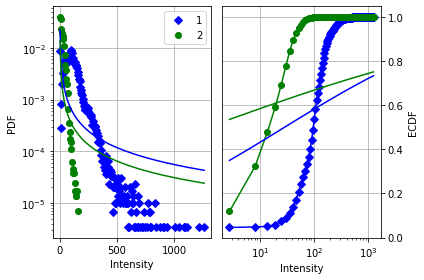

In [ ]:
from turbustat.statistics import PDF_Distance
import numpy as np

data_orion_mom0_12co = orion_mom0_12co.value
data_orion_mom0_13co = orion_mom0_13co.value

data_orion_mom0_12co[data_orion_mom0_12co<=0] = np.nan
data_orion_mom0_13co[data_orion_mom0_13co<=0] = np.nan
#need to be normalized from turbustat documentation section pdf
pdf_dist = PDF_Distance(data_orion_mom0_12co, data_orion_mom0_13co)

pdf_dist.distance_metric(verbose=True)

The PDF distance returns the fit summaries of both PDFs using a log-normal distribution. The plot shows the PDF (left) and empirical cumulative distribution function (ECDF; right) to compare the two data sets. The solid lines in both plots are the log-normal fits.

There are 3 different distance metrics that are defined for comparing PDFs:

1. The [Hellinger distance](https://en.wikipedia.org/wiki/Hellinger_distance): which directly compares the values of 2 PDFs,

2. The [Kolmogorov-Smirnov distance](https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test): the well-known test whose values is the maximum difference between 2 ECDFs,

3. And the [Log-normal width distance](https://turbustat.readthedocs.io/en/latest/tutorials/metrics/pdf_example.html): which we have defined as the t-statistic between the fitted log-normal widths.

By default, we know that the 12CO is brighter by $\sim10\times$ compared to 13CO. This means that we cannot directly compare the PDF values to measure the distance, as in 1. and 2., because the differences will simply be due to this $10\times$ factor between the two tracers.

However, the width of the distributions is independent of the mean value. This allows us to still use the log-normal distance metric:


In [ ]:
pdf_dist.lognormal_distance

134.1603530147634

To use the other distance metrics, we need to normalize the brightness values before comparing the distributions. TurbuStat has different normalizations built-in (see the PDF tutorial). In this case we will use a simple one: normalization by the mean of each distribution.

Optimization terminated successfully.
         Current function value: 0.606743
         Iterations: 20
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: 0.802561
         Iterations: 21
         Function evaluations: 41
                              Likelihood Results                              
Dep. Variable:                      y   Log-Likelihood:            -1.5169e+05
Model:                     Likelihood   AIC:                         3.034e+05
Method:            Maximum Likelihood   BIC:                         3.034e+05
Date:                Tue, 13 Jul 2021                                         
Time:                        15:46:34                                         
No. Observations:              250000                                         
Df Residuals:                  249998                                         
Df Model:                           2                                         
             

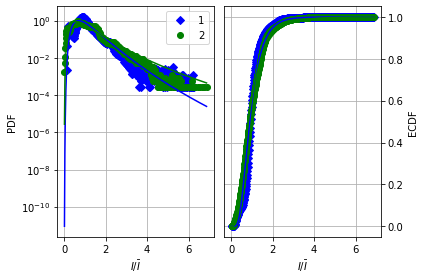

In [ ]:
pdf_dist = PDF_Distance(orion_mom0_12co_region1, orion_mom0_13co_region1, normalization_type='normalize_by_mean')

pdf_dist.distance_metric(verbose=True)

Both distributions now have a similar range of values, allowing us to directly compare the distribution properties:

In [ ]:
print(pdf_dist.hellinger_distance)
print(pdf_dist.ks_distance)
print(pdf_dist.lognormal_distance)


0.2378274255565781
0.169128
134.1597748292297


Note that the log-normal distance is nearly identical, as we expected from above.

## Summary ##

This notebook has demonstrated different turbulence statistics and ways to compare data sets.

Our task in this project is to choose a direction for comparing the data sets, produce distance values for these comparisons using a range of turbulence statistics, and explore whether the distances we measure are related to other ISM properties.

There is a large range of comparisons that can be made. As a group, we will discuss a direction to focus on during the ISM summer school.


In [ ]:
# Uncomment to ensure changes are saved:
# drive.flush_and_unmount()